## Numeric vs symbolic computation
A first use of symbolic computation would be to perform exact algebra. Consider the following calculation:

Let $x = \sqrt{27}$ and $y = \sqrt{3}$. Then $x/y = \sqrt{27}/\sqrt{3} = 3\sqrt{3} / \sqrt{3} = 3$.
Let's do this computation with python / numpy:

In [1]:
import numpy as np
x = np.sqrt(27)
y = np.sqrt(3)

print(type(x))
print (x/y)

<class 'numpy.float64'>
3.0000000000000004


In [2]:
import sympy
x = sympy.sqrt(27)
y = sympy.sqrt(3)
print(type(x))
x,y,x/y


<class 'sympy.core.mul.Mul'>


(3*sqrt(3), sqrt(3), 3)

Loosely speaking, `np.sqrt(3)` represent the number obtained by taking the square root of 3. `sympy.sqrt(3)` represent the sequence of operations consisting in taking a number (3) and its square root. When evaluating `sympy.sqrt(27) / sympy.sqrt(3)`, sympy evaluates the sequence of operations involved. The `/` and `sqrt` operators are complex rules, capable of doing automatic simplifications.
See for instance:

In [3]:
sympy.sqrt(27)

3*sqrt(3)

In [4]:
x = 2

x== 5

x == 2

True

It gets *much* better than that... Just sympy is capable of representing teh square root in `sqrt(27)` as "the operation of taking the square root" of something that happens to be 27, it can deal with *symbols*:

In [5]:
from sympy import *
x = Symbol('x')
y = Symbol('y')
x,y = symbols( ('x', 'y') )
expr = x + 2*y
expr


x + 2*y

In [6]:
(expr - x)**2


4*y**2

In [7]:
x * expr

x*(x + 2*y)

For the sake of it, we can peek at the representation of these expressions:

In [8]:
srepr(x*(x + 2*y))

"Mul(Symbol('x'), Add(Symbol('x'), Mul(Integer(2), Symbol('y'))))"

### `/`, `//`, and `Rational`
Because it is built on top of python and because python evaluate the expressions it understands, constant fractions require a special treatment:

`expr = 1/2` is exactly teh same as `expr = 0.5`. If we wanted to clearly indicate that we work with rational numbers and want to keep the ratio expressed as an integer, we can either use `Integers` or `Rational`:

In [9]:
expr = 1/2
print(type(expr))

expr

<class 'float'>


0.5

In [10]:
expr = sympy.sqrt(3)
print(type(expr))
expr



<class 'sympy.core.power.Pow'>


sqrt(3)

In [11]:
expr = Integer(1) / Integer(2)
print(type(expr))

expr

<class 'sympy.core.numbers.Half'>


1/2

In [12]:
expr = Rational(1,2)
print(type(expr))
expr

<class 'sympy.core.numbers.Half'>


1/2

### Sympy can simplify, factor or expand expressions: 

In [13]:
expr = x + 2*y
x * expr


x*(x + 2*y)

In [14]:
from sympy import expand, factor
expr = x + 2*y
expanded_expr = expand(x*expr)
expanded_expr


x**2 + 2*x*y

In [15]:
factor(expanded_expr)

x*(x + 2*y)

We can turn off sympy's fancy printing with `sympy.init_printing` (useful to cut and paste sypy expressions in a code)

In [16]:
sympy.init_printing(pretty_print=False)
expanded_expr


x**2 + 2*x*y

In [17]:
sympy.init_printing(pretty_print=True)
expanded_expr


### Sympy can import expression from strings

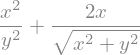

In [18]:
expr = sympify('x**2/y**2 + 2*x/sqrt(x**2+y**2)')
expr

### Some examples of what sympy can do

In [19]:
from sympy import *
factor(diff(sin(x)*exp(x), x))



In [20]:
integrate(x**2*sin(x), x)

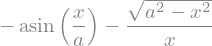

In [21]:
a = Symbol('a', positive=True)
integrate(sqrt(a**2-x**2)/x**2, x)

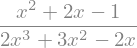

In [22]:

(x**2+2*x-1)/(2*x**3+3*x**2-2*x)

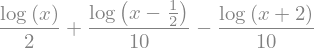

In [23]:
### Example2 Chapter 7.4 in Stewart calculus:
x = Symbol('x')
integrate((x**2+2*x-1)/(2*x**3+3*x**2-2*x),x)
# note that the result is not perfect. It assumes that x > 1/2. 
# The general result has log(|...|) in it

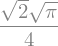

In [24]:
integrate(sin(x**2), (x, 0, oo))

In [25]:
limit(sin(x)/x, x, 0)

In [26]:
solve(x**2 - a, x)

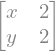

In [27]:

Matrix([[x, 2], [y, 2]])


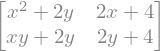

In [28]:
Matrix([[x, 2], [y, 2]])**2


## Symbols

Symbols are like mathematical independent variables. In order to define an expression, we must declare its arguments as symbols:

In [29]:
z = Symbol('z')
expr = z+1
expr

In the line above, we have defined a python variable `z` whose type is `sympy.Symbol`, and which will be displayed as 'z'.
Technically, one could do evil things like this...
Please don't...

In [30]:
z = Symbol('alpha')
alpha = Symbol('z')
z+ 2 * alpha



In [31]:
del(alpha) 
del(z)



## Substitution

`subs` can be used to do mathematical substitutions. Note that it does *not* change the expression (sympy expressions are immutable) on which it acts

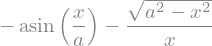

In [32]:
a = Symbol('a',positive=True)
x = Symbol('x')
trig_expr = integrate(sqrt(a**2-x**2)/x**2, x)
trig_expr



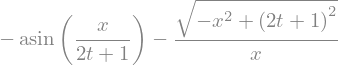

In [33]:
t = Symbol('t')
new_expr = trig_expr.subs(a,2*t+1)
new_expr

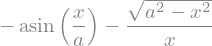

In [34]:
trig_expr

In [35]:
expr = cos(x/a)
expr.subs(x,0)

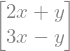

In [36]:
expr = Matrix([2*x+y, 3*x-y])
expr


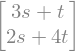

In [37]:
s,t = symbols(('s','t'))
# Thus is a shortcut for
# s= Symbol('s')
# t - Symbol('t')
expr.subs([(x, s+t),(y,s-t)])

in passing, this is composing x = s+t and y = s-t into (2*x+y, 3*x-y), which is how I introduced matrices... And by the way: 

In [38]:
np.array([[2,1],[3,-1]]) @ np.array([[1,1],[1,-1]])

array([[3, 1],
       [2, 4]])

Or the sympy way:

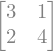

In [39]:
Matrix([[2,1],[3,-1]]) * Matrix([[1,1],[1,-1]])

## numerical evaluation
Sometimes, we may want to get the numerical value of a complex expression. we can use `evalf` to do this:

In [40]:
pi.evalf(100)

In [41]:
exp(1).evalf(32)

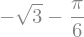

In [42]:
# reusing the complicated integral we computed earlier
expr2 = trig_expr.subs([(x,Rational(1,2)), (a,1)])
expr2


In [43]:
expr2.evalf()

Another way of evaluating is to convert an expression into a python function, and evaluating the function:

In [44]:
trig_expr = integrate(sqrt(a**2-x**2)/x**2, x)
expr2 = trig_expr.subs(a,1)
f = lambdify(x, expr2)
f(1/2)

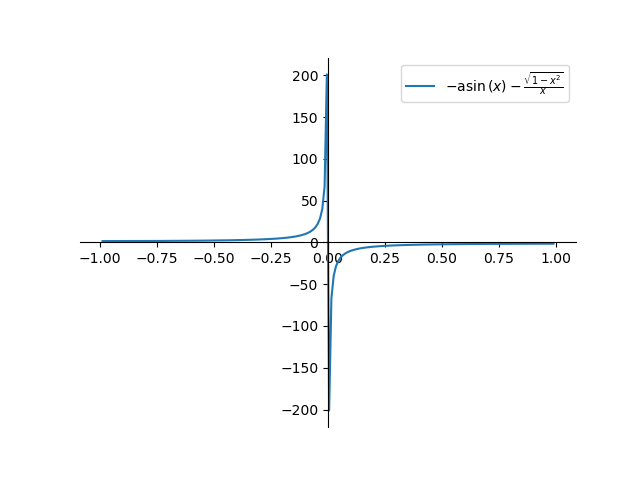

In [45]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
X = np.linspace(-0.99,0.99,200)
ax.plot(X,f(X), label = f'${latex(expr2)}$')
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)
ax.legend()


### Plotting from sympy
In the previous example, we took a sympy expression, converted it to a python function then used matplotlib to plot it.
sympy has its own plot function.


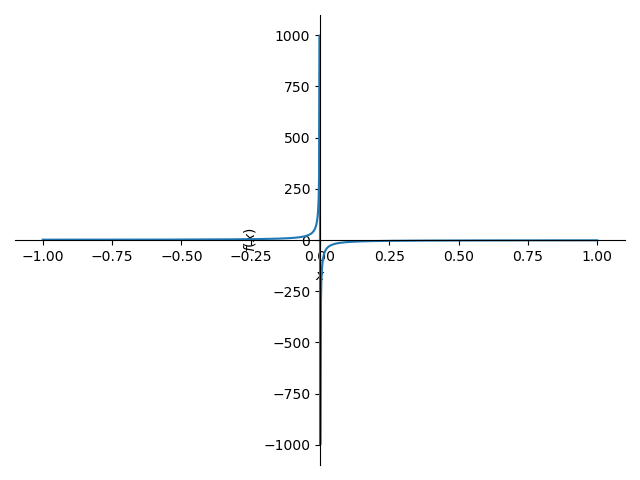

In [46]:
p = plot(expr2, (x,-1,1))

sympy plot is not as full featured as matplotlib but does the job for math plots:
see https://docs.sympy.org/latest/modules/plotting.html for more details

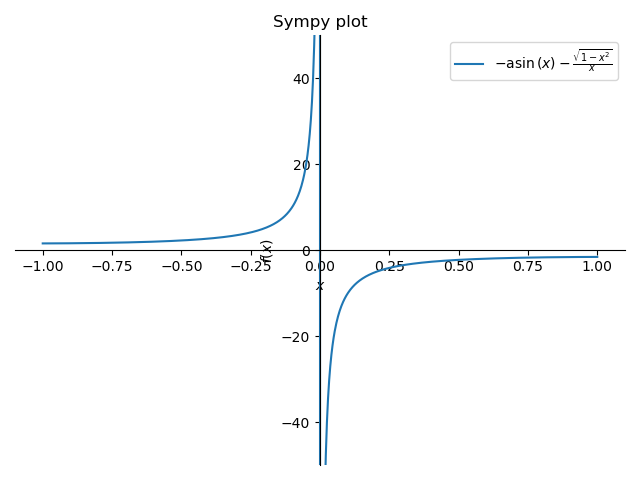

In [47]:
p = plot(expr2, (x,-1,1), label = f'${latex(expr2)}$', show=False)
p.ylim=(-50,50)
p.legend = True
p.title = "Sympy plot"
p.show()


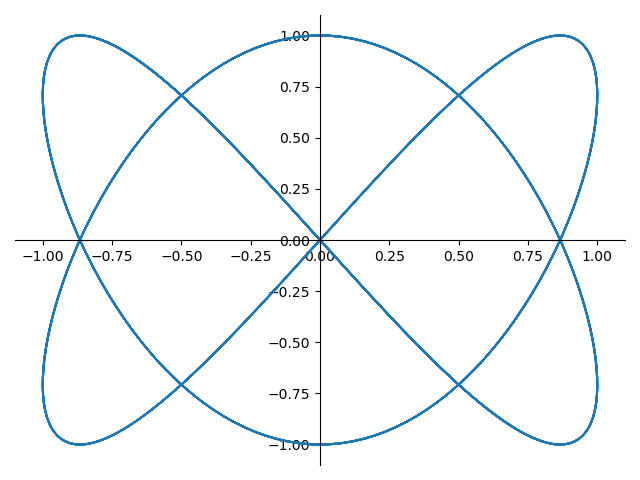

In [48]:
plot_parametric((sin(2*pi*t), sin(3*pi*t)), (t,-pi,pi))

In [49]:
a,x,y = symbols( ('a','x','y') )
u,s,t = symbols( ('u','s','t') )
expr = 2*x - (1-a)/exp(y)
expr.subs ( [ (x,u), (y, 2*u+t) ] )





_IncompleteInputError: incomplete input (652316966.py, line 1)